<h1> Implémentation d'un arbre binaire avec une classe </h1>

On pourrait définir deux classes pour implémenter la structure d’un arbre binaire : <br>


**class Noeud** 
   
    def __init__(self, etiquette, gauche=None, droit=None):
        self.etiquette = etiquette
        self.gauche = gauche
        self.droit = droit

**class ArbreBinaire**:
    
    def __init__(self,racine):
        # racine est soit None (arbre vide) soit un objet de la classe noeud
        self.racine=racine 

En pratique, on utilisera généralement l’implémentation objet avec une seule classe, même si elle pose le problème de l’arbre vide qui n’est pas un arbre. <br>
Une implémentation classique consiste à représenter chaque noeud comme un objet d'une classe Noeud.<br>
La construction d'un arbre s'effectue alors avec des noeuds ayant soit un seul argument (cas des feuilles), soit trois (cas général).<br>
Si on doit rajouter des méthodes sur les arbres incluant le cas de l’arbre vide, on choisira l’implémentation
avec deux classes.

In [23]:
class Noeud:
    def __init__(self, valeur=None, gauche = None, droit = None):
        self.valeur = valeur # étiquette du noeud
        self.gauche = gauche # sous arbre gauche
        self.droit = droit # sous arbre droit
    
    
    # une représentation possible
    def __repr__(self):
        ch = str(self.valeur)
        if self.gauche or self.droit:
            ch = ch + '-(' + str(self.gauche) + ',' + str(self.droit) + ')'
        return ch 
        
    def fils_gauche(self):
        return self.gauche
    
    def est_feuille(self):
        return self.gauche==None and self.droit==None

la construction d'un arbre se fait alors par la définition de noeud imbriqués :

In [24]:
n9 = Noeud(9)
n7 = Noeud(7, None, n9)
n13 = Noeud(13)
n11 = Noeud(11,n7, n13)
n3 = Noeud(3)
n2 = Noeud(2, None, n3)
arbre1 = Noeud(5, n2, n11) # c'est le noeud racine

ou

In [25]:
arbre2= Noeud(5,Noeud(2,None,Noeud(3)),Noeud(11,Noeud(7,None,Noeud(9)),Noeud(13)))

In [26]:
print(arbre1)
print(arbre2)
arbrevide=Noeud()
print(arbrevide)

5-(2-(None,3),11-(7-(None,9),13))
5-(2-(None,3),11-(7-(None,9),13))
None


A. Complèter la classe Noeud par les méthodes puis les tester : 
<div style="margin-left:50px">
<li> fils_gauche et fils droit qui renvoie les sous arbre gauche et droit </li>
<li> est_feuille qui renvoie un booleen si le noeud est une feuille </li>
<li> est_vide qui renvoie un boleen si l'arbre est vide </li>
</div>

In [36]:
# jeux de tests
n7.est_feuille()

False

B. Ecrire le code des fonctions hauteur et taille (on choisira -1 pour la hauteur un arbre vide et 0 pour un arbre avec un seul noeud)

In [28]:
def hauteur(A):
    if A is None:
        return -1
    else:
        return 1+max(hauteur(A.gauche),hauteur(A.droit))
 

In [29]:
def taille(A):
    if A is None:
        return 0
    else:
        return 1+ taille(A.gauche)+taille(A.droit)

In [30]:
# jeux de tests
print(hauteur(arbre1))
print(taille(arbre1))

3
7


C . Ecrire une fonction qui compte le nombre de feuilles d'un arbre :

In [39]:
def nb_feuilles(A):
    if A is None:
        return 0
    elif A.est_feuille():
        return 1
    return nb_feuilles(A.gauche)+nb_feuilles(A.droit)

In [42]:
nb_feuilles(arbre1)

3

D. Ecrire une fonction booléenne récursive qui recherche si une valeur v est présente dans un arbre A

In [ ]:
def recherche(A,v):
    if A is None:
        return False
    elif A.valeur==v:
            return True
    else:
        return recherche(A.gauche,v) or recherche(A.droit,v)

In [ ]:
recherche(arbre1,15)

False

E. Réprésentation d'un arbre

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

def repr_graph(arbre, size=(4,3), null_node=False):
    """
    size : tuple de 2 entiers. Si size est int -> (size, size)
    null_node : si True, trace les liaisons vers les sous-arbres vides
    """
    def parkour(arbre, noeuds, branches, labels, positions, profondeur, pos_courante, pos_parent, null_node):
        if arbre != None:
            noeuds[0].append(pos_courante)
            positions[pos_courante] = (pos_courante, profondeur)
            profondeur -= 1
            labels[pos_courante] = str(arbre.valeur)
            branches[0].append((pos_courante, pos_parent))
            pos_gauche = pos_courante - 2**profondeur
            parkour(arbre.gauche, noeuds, branches, labels, positions, profondeur, pos_gauche, pos_courante, null_node)
            pos_droit = pos_courante + 2**profondeur
            parkour(arbre.droit, noeuds, branches, labels, positions, profondeur, pos_droit, pos_courante, null_node)
        elif null_node:
            noeuds[1].append(pos_courante)
            positions[pos_courante] = (pos_courante, profondeur)
            branches[1].append((pos_courante, pos_parent))
    
    
    if arbre ==None:
        return
    
    branches = [[]]
    profondeur = hauteur(arbre)
    pos_courante = 2**profondeur
    noeuds = [[pos_courante]]
    positions = {pos_courante: (pos_courante, profondeur)} 
    labels = {pos_courante: str(arbre.valeur)}
    
    if null_node:
        branches.append([])
        noeuds.append([])
        
    profondeur -= 1
    parkour(arbre.gauche, noeuds, branches, labels, positions, profondeur, pos_courante - 2**profondeur, pos_courante, null_node)
    parkour(arbre.droit, noeuds, branches, labels, positions, profondeur, pos_courante + 2**profondeur, pos_courante, null_node) 

    mon_arbre = nx.Graph()
    
    if type(size) == int:
        size = (size, size)    
    plt.figure(figsize=size)
    
    nx.draw_networkx_nodes(mon_arbre, positions, nodelist=noeuds[0], node_color="white", node_size=550, edgecolors="blue")
    nx.draw_networkx_edges(mon_arbre, positions, edgelist=branches[0], edge_color="black", width=2)
    nx.draw_networkx_labels(mon_arbre, positions, labels)

    if null_node:
        nx.draw_networkx_nodes(mon_arbre, positions, nodelist=noeuds[1], node_color="white", node_size=50, edgecolors="grey")
        nx.draw_networkx_edges(mon_arbre, positions, edgelist=branches[1], edge_color="grey", width=1)

    ax = plt.gca()
    ax.margins(0.1)
    plt.axis("off")
    plt.show()
    plt.close()

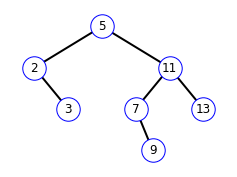

In [ ]:
repr_graph(arbre1,(4,3),False)

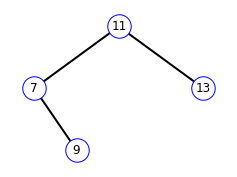

In [ ]:
repr_graph(n11,(4,3),False)